## 이론적인 Asian Option 의 예제

아시아 옵션은 기초 자산의 특정 기간 동안의 평균 가격에 따라 만기 시점의 페이오프가 결정됩니다.
평균 가격을 계산하는 방식에 따라 Arithmetic Average(산술 평균)와 Geometric Average(기하 평균)로 나뉩니다.


Asian Call Option Price: 5.73


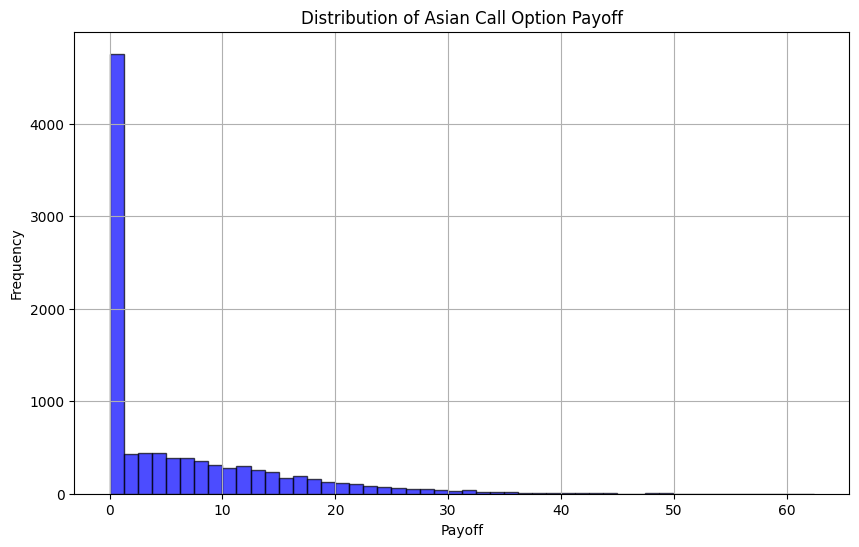

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def asian_option_payoff(S, K, option_type="call"):
    """
    아시아 옵션의 페이오프 계산 함수

    Parameters:
    S: 기초 자산의 가격 경로 배열 (2D 배열)
    K: 행사가격
    option_type: "call" 또는 "put"

    Returns:
    아시아 옵션의 페이오프 배열
    """
    average_price = np.mean(S, axis=1)
    if option_type == "call":
        payoff = np.maximum(average_price - K, 0)
    elif option_type == "put":
        payoff = np.maximum(K - average_price, 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    return payoff

# 예제 파라미터
S0 = 100  # 초기 주식 가격
K = 100  # 행사가격
T = 1  # 만기 시간 (1년)
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성
M = 252  # 기간 수 (일 수)
I = 10000  # 시뮬레이션 수

# 기초 자산 가격 경로 시뮬레이션 (지오메트릭 브라운 운동)
dt = T / M
S = np.zeros((I, M + 1))
S[:, 0] = S0
for t in range(1, M + 1):
    z = np.random.standard_normal(I)
    S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)

# 아시아 옵션 페이오프 계산
asian_call_payoff = asian_option_payoff(S, K, option_type="call")

# 아시아 옵션 가격 계산 (할인된 페이오프 평균)
asian_call_price = np.exp(-r * T) * np.mean(asian_call_payoff)
print(f"Asian Call Option Price: {asian_call_price:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(asian_call_payoff, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Asian Call Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## 실제 데이터를 활용

[*********************100%%**********************]  1 of 1 completed


Asian Call Option Price: 21.45


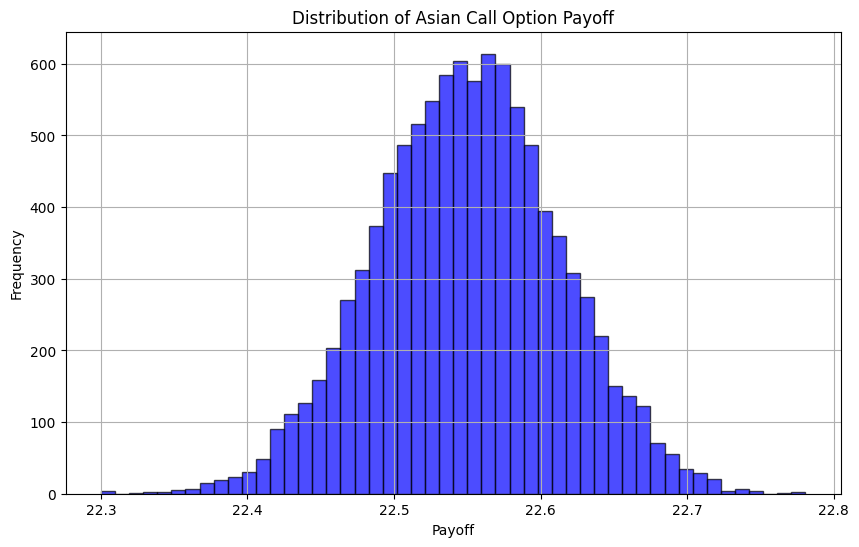

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def asian_option_payoff(S, K, option_type="call"):
    """
    아시아 옵션의 페이오프 계산 함수

    Parameters:
    S: 기초 자산의 가격 경로 배열 (2D 배열)
    K: 행사가격
    option_type: "call" 또는 "put"

    Returns:
    아시아 옵션의 페이오프 배열
    """
    average_price = np.mean(S, axis=1)
    if option_type == "call":
        payoff = np.maximum(average_price - K, 0)
    elif option_type == "put":
        payoff = np.maximum(K - average_price, 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    return payoff

# yfinance를 사용하여 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
closing_prices = data['Close'].values

# 아시아 옵션 파라미터 설정
K = 150  # 행사가격
option_type = "call"
r = 0.05  # 무위험 이자율
T = 1  # 만기 시간 (1년)
M = len(closing_prices)  # 실제 데이터의 기간 수

# 주식 가격 경로 시뮬레이션 (실제 데이터 사용)
I = 10000  # 시뮬레이션 수
S = np.zeros((I, M))
for i in range(I):
    S[i] = closing_prices + np.random.normal(0, 1, M)

# 아시아 옵션 페이오프 계산
asian_call_payoff = asian_option_payoff(S, K, option_type)

# 아시아 옵션 가격 계산 (할인된 페이오프 평균)
asian_call_price = np.exp(-r * T) * np.mean(asian_call_payoff)
print(f"Asian Call Option Price: {asian_call_price:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(asian_call_payoff, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Asian Call Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
